In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('911.csv')

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652692 entries, 0 to 652691
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        652692 non-null  float64
 1   lng        652692 non-null  float64
 2   desc       652692 non-null  object 
 3   zip        573727 non-null  float64
 4   title      652692 non-null  object 
 5   timeStamp  652692 non-null  object 
 6   twp        652409 non-null  object 
 7   addr       652692 non-null  object 
 8   e          652692 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 32.4+ MB


In [9]:
df['zip'].value_counts().head(5)

19401.0    44785
19464.0    43155
19403.0    34299
19446.0    31715
19406.0    22071
Name: zip, dtype: int64

In [10]:
df['twp'].value_counts().head(5)

LOWER MERION    54686
ABINGTON        39302
NORRISTOWN      36931
UPPER MERION    35412
CHELTENHAM      30044
Name: twp, dtype: int64

In [11]:
df['title'].nunique()

148

In [14]:
df['reason']=df['title'].apply(lambda title: title.split(':')[0])

In [16]:
df['reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
652687        EMS
652688        EMS
652689    Traffic
652690        EMS
652691        EMS
Name: reason, Length: 652692, dtype: object

In [19]:
df['reason'].value_counts()

EMS        326850
Traffic    227045
Fire        98797
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

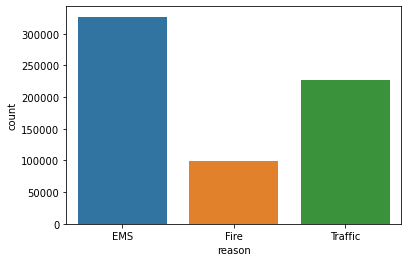

In [21]:
sns.countplot(x='reason',data=df)

In [23]:
 df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [25]:
df['hour']=df['timeStamp'].apply(lambda time: time.hour )

In [35]:
df['month']=df['timeStamp'].apply(lambda time: time.month )
df['day of week']=df['timeStamp'].apply(lambda time: time.dayofweek )

In [30]:
dmap={0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}

In [37]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652687,40.116526,-75.340552,DEKALB ST & E MARSHALL ST; NORRISTOWN; Statio...,19401.0,EMS: SEIZURES,2020-06-29 11:20:11,NORRISTOWN,DEKALB ST & E MARSHALL ST,1,EMS,11,6,0
652688,40.081618,-75.405643,BRYCE LN & E SWEDESFORD RD; UPPER MERION; Sta...,19406.0,EMS: POISONING,2020-06-29 11:16:38,UPPER MERION,BRYCE LN & E SWEDESFORD RD,1,EMS,11,6,0
652689,40.172526,-75.284653,DEKALB PIKE & BLUE BELL SPRINGS DR; WHITPAIN; ...,19422.0,Traffic: VEHICLE ACCIDENT -,2020-06-29 11:17:27,WHITPAIN,DEKALB PIKE & BLUE BELL SPRINGS DR,1,Traffic,11,6,0
652690,40.376450,-75.481847,5TH ST & BITTING ALY; RED HILL; Station 369; ...,18076.0,EMS: BACK PAINS/INJURY,2020-06-29 11:23:32,RED HILL,5TH ST & BITTING ALY,1,EMS,11,6,0


In [38]:
df['day of week']=df['day of week'].map(dmap)

In [41]:
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,thu
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,15,12,thu
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,16,12,thu
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,16,12,thu
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,16,12,thu
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,thu


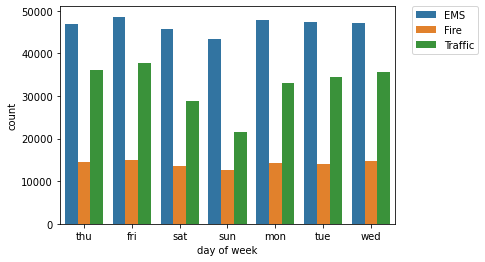

In [48]:
sns.countplot(x='day of week', data=df, hue='reason')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

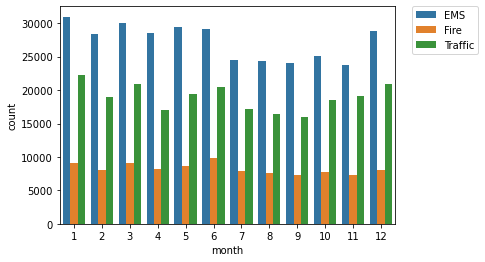

In [49]:
sns.countplot(x='month', data=df, hue='reason')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [53]:
df['date']=df['timeStamp'].apply(lambda t: t.date())

In [80]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652687,40.116526,-75.340552,DEKALB ST & E MARSHALL ST; NORRISTOWN; Statio...,19401.0,EMS: SEIZURES,2020-06-29 11:20:11,NORRISTOWN,DEKALB ST & E MARSHALL ST,1,EMS,11,6,mon,2020-06-29
652688,40.081618,-75.405643,BRYCE LN & E SWEDESFORD RD; UPPER MERION; Sta...,19406.0,EMS: POISONING,2020-06-29 11:16:38,UPPER MERION,BRYCE LN & E SWEDESFORD RD,1,EMS,11,6,mon,2020-06-29
652689,40.172526,-75.284653,DEKALB PIKE & BLUE BELL SPRINGS DR; WHITPAIN; ...,19422.0,Traffic: VEHICLE ACCIDENT -,2020-06-29 11:17:27,WHITPAIN,DEKALB PIKE & BLUE BELL SPRINGS DR,1,Traffic,11,6,mon,2020-06-29
652690,40.376450,-75.481847,5TH ST & BITTING ALY; RED HILL; Station 369; ...,18076.0,EMS: BACK PAINS/INJURY,2020-06-29 11:23:32,RED HILL,5TH ST & BITTING ALY,1,EMS,11,6,mon,2020-06-29


In [103]:
pp=df.groupby(by=['day of week','hour']).count()['reason'].unstack()

<AxesSubplot:xlabel='hour', ylabel='day of week'>

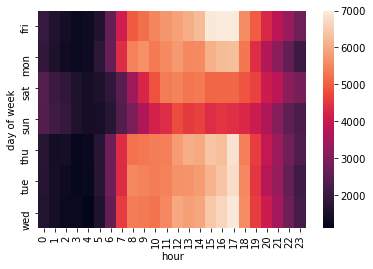

In [104]:
sns.heatmap(pp)

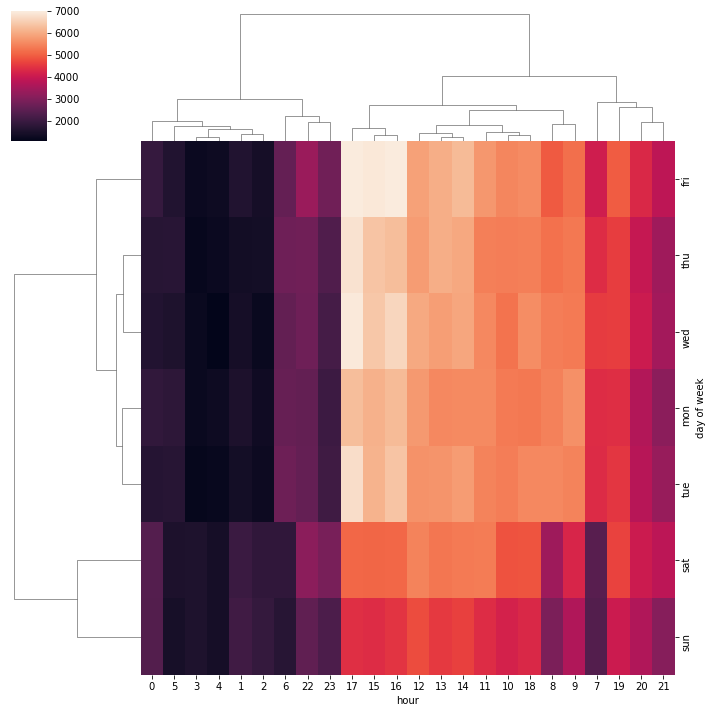

In [112]:
sns.clustermap(pp)